## <b>Heuristic Comparison for A*</b> 

<p style="font-size:16px;">
Heuristic Comparison for A*<br>
Evaluating heuristic functions in the A* pathfinding algorithm.<br>
Average Total Cost, Nodes Explored, and Computation Time over 10 random 20×20 grids (Start=(0,0), Goal=(19,19)).
</p>


In [9]:
import time
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import numpy as np

from Group7_Deliverable_1 import astar, HEURISTICS, FLAT, SANDY, ROCK, TERRAIN_COST


<p style="font-size:16px;">
Helper function to generate random 20x20 grid<br>
</p>


In [10]:
def generate_random_grid(rows=20, cols=20):
    terrains = [FLAT, SANDY, ROCK]
    weights = [0.6, 0.3, 0.1]  # Mostly flat
    grid = [[random.choices(terrains, weights)[0] for _ in range(cols)] for _ in range(rows)]
    return grid


<p style="font-size:16px;">
Run A* with all heuristics on random grids<br>
Start = (0,0), Goal = (19,19)<br>
</p>

In [11]:
def run_comparison(num_trials=5):
    results = []

    for trial in range(num_trials):
        grid = generate_random_grid()
        start, goal = (0, 0), (19, 19)

        for name, hfn in HEURISTICS.items():
            t0 = time.time()
            path, explored, cost = astar(grid, start, goal, hfn)
            t1 = time.time()

            results.append({
                'Trial': trial + 1,
                'Heuristic': name,
                'Path Length': len(path) if path else None,
                'Total Cost': cost if path else float('inf'),
                'Nodes Explored': explored,
                'Time (s)': round(t1 - t0, 4)
            })

    return pd.DataFrame(results)


<p style="font-size:16px;">
Execute experiments on 10 random grids<br>
</p>

In [12]:
df = run_comparison(num_trials=10)
display(df)

,Trial,Heuristic,Path Length,Total Cost,Nodes Explored,Time (s)
0,1,Manhattan,39,205.0,363,0.0024
1,1,Euclidean,39,205.0,363,0.0023
2,1,Terrain (aggressive),39,240.0,45,0.0026
3,1,Adaptive Cost (H1),39,220.0,48,0.0010
4,1,Obstacle Aversion (H2),39,215.0,54,0.0040
5,2,Manhattan,39,195.0,366,0.0019
6,2,Euclidean,39,195.0,366,0.0011
7,2,Terrain (aggressive),39,250.0,58,0.0053
8,2,Adaptive Cost (H1),39,220.0,43,0.0000
9,2,Obstacle Aversion (H2),39,220.0,50,0.0027


<p style="font-size:16px;">
Compute average metrics per heuristic<br>
</p>

In [13]:
# firstly filtering out only successful trials (where path is found)
df_success = df[df['Total Cost'] != float('inf')]

summary_success = (
    df_success.groupby('Heuristic', as_index=False)
    .agg({
        'Total Cost': 'mean',
        'Nodes Explored': 'mean',
        'Time (s)': 'mean'
    })
)

display(Markdown(" Average Results over all Trials (Successful Paths Only) )"))
display(summary_success)

 Average Results over all Trials (Successful Paths Only) )

,Heuristic,Total Cost,Nodes Explored,Time (s)
0,Adaptive Cost (H1),216.0,46.7,0.00015
1,Euclidean,205.5,358.6,0.00121
2,Manhattan,205.5,358.6,0.00138
3,Obstacle Aversion (H2),220.0,48.8,0.00268
4,Terrain (aggressive),239.0,56.5,0.00291



<p style="font-size:16px;">
Average Total Cost<br>
</p>

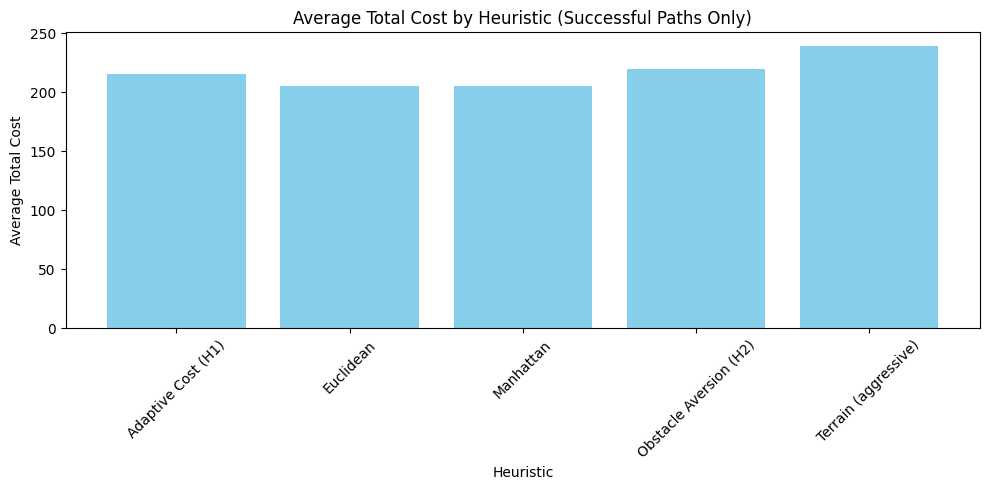

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(summary_success['Heuristic'], summary_success['Total Cost'], color='skyblue')
plt.title('Average Total Cost by Heuristic (Successful Paths Only)')
plt.xlabel('Heuristic')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<p style="font-size:16px;">
Average Nodes Explored<br>
</p>

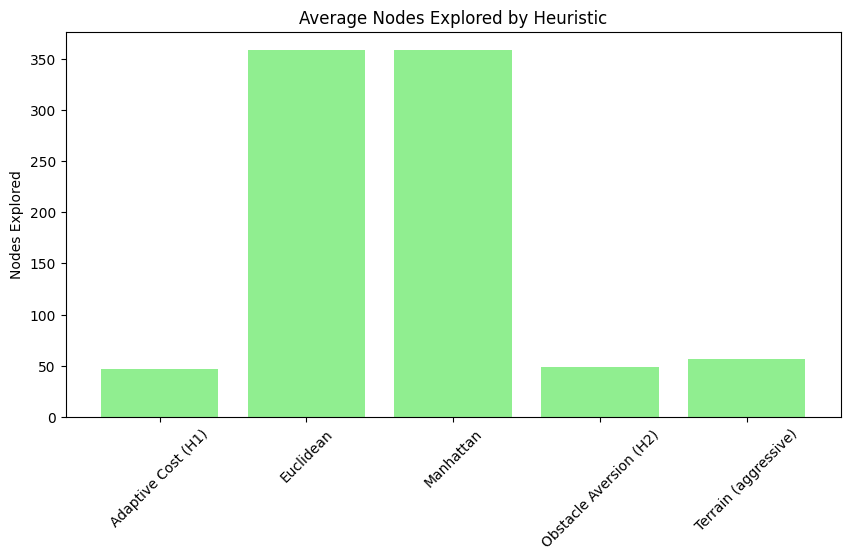

In [15]:
plt.figure(figsize=(10,5))
plt.bar(summary_success['Heuristic'], summary_success['Nodes Explored'], color='lightgreen')
plt.title('Average Nodes Explored by Heuristic')
plt.xticks(rotation=45)
plt.ylabel('Nodes Explored')
plt.show()


<p style="font-size:16px;">
Average Computation Time<br>
</p>

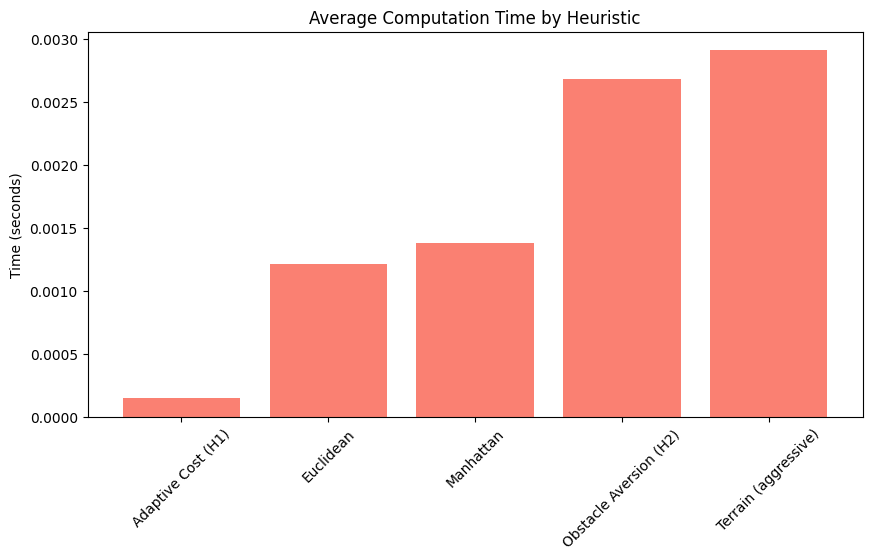

In [16]:
plt.figure(figsize=(10,5))
plt.bar(summary_success['Heuristic'], summary_success['Time (s)'], color='salmon')
plt.title('Average Computation Time by Heuristic')
plt.xticks(rotation=45)
plt.ylabel('Time (seconds)')
plt.show()


## Comparison Report

### Heuristic Comparison Summary

| Heuristic              | Efficiency (Nodes)  | Optimality (Cost)         | Speed (Computation Time) | Consistent | Admissible |
|-------------------------|--------------------|----------------------------|---------------------------|-------------|-------------|
| **Adaptive Cost (H1)**  | High (few nodes)   | Moderate                  | Fast                      | Yes         | Yes         |
| **Euclidean**           | Low (many nodes)   | High (lowest cost)         | Moderate                  | Yes         | Yes         |
| **Manhattan**           | Low (many nodes)   | High (lowest cost)         | Moderate                  | Yes         | Yes         |
| **Obstacle Aversion (H2)** | Moderate (fewer) | Low (higher cost)          | Slow                      | No          | No          |
| **Terrain (Aggressive)** | Moderate (fewer)  | Lowest (least optimal)     | Very Slow                 | No          | No          |

---

**Interpretation Summary**
- **Adaptive Cost (H1)** → Best balance between speed, efficiency, and near-optimal paths.  
- **Euclidean / Manhattan** → Most optimal but explore more nodes (less efficient).  
- **Obstacle Aversion (H2)** → Safe but slow and may overestimate cost.  
- **Terrain (Aggressive)** → Prioritizes fast routes but produces least optimal paths.
